<a href="https://colab.research.google.com/github/aimanhaziqmy/mycardiacrehab/blob/main/myCardiacRehab_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv(r"/content/myCardiacRehab_survey.csv")

In [ ]:
data.head()

## Analyst the dataframe

In [ ]:
data.isnull().sum()

userId            0
name              0
gender          138
email             0
surveyType        0
questionId        0
questionText      0
answerId          0
answerName        0
dtype: int64

In [87]:
data.dtypes

userId          object
name            object
gender          object
email           object
surveyType      object
questionId       int64
questionText    object
answerId         int64
answerName      object
dtype: object

In [88]:
data.surveyType.unique()

array(['register', 'profile', 'info', 'appointment'], dtype=object)

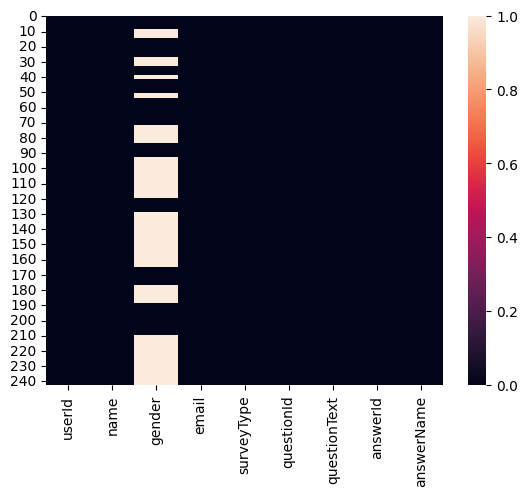

In [ ]:
sns.heatmap(data.isnull())
plt.show()

## Data analysis
1. For each questionid, separate each other and then group by likeness.

In [93]:
register = data[data['surveyType'] == 'register']
profile = data[data['surveyType'] == 'profile']
info = data[data['surveyType'] == 'info']
appointment = data[data['surveyType'] == 'appointment']

In [141]:
q1 = data[data['questionId'] == 1].loc[:,["answerId","questionId"]].groupby('answerId').count()

In [142]:
q1

,questionId
answerId,
1,5
2,13
3,24
4,22
5,17


In [143]:
q2 = data[data['questionId'] == 2].loc[:,["answerId","questionId"]].groupby('answerId').count()

In [144]:
q2

,questionId
answerId,
1,5
2,16
3,22
4,24
5,14


In [145]:
q3 = data[data['questionId'] == 3].loc[:,["answerId","questionId"]].groupby('answerId').count()

In [146]:
q3

,questionId
answerId,
1,3
2,18
3,28
4,19
5,13


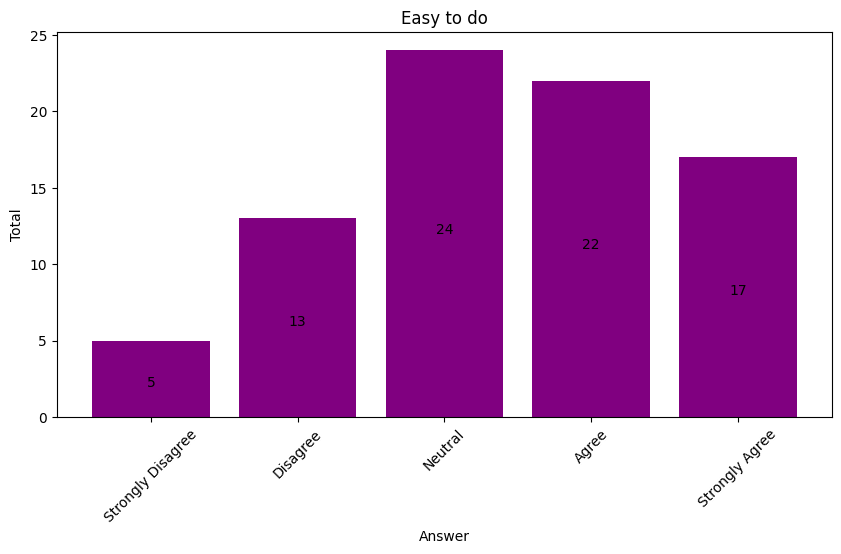

In [147]:
fig = plt.figure(figsize=(10,5))
def addLabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i]//2 ,y[i], ha="center")

q1_ans  = np.array(q1)
q_question = ['Strongly Disagree', "Disagree", 'Neutral', 'Agree', 'Strongly Agree']
plt.bar(q_question, q1_ans.flatten(), color="purple")
addLabels(q_question, q1_ans.flatten())
plt.title("Easy to do")
plt.xlabel("Answer")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.show()

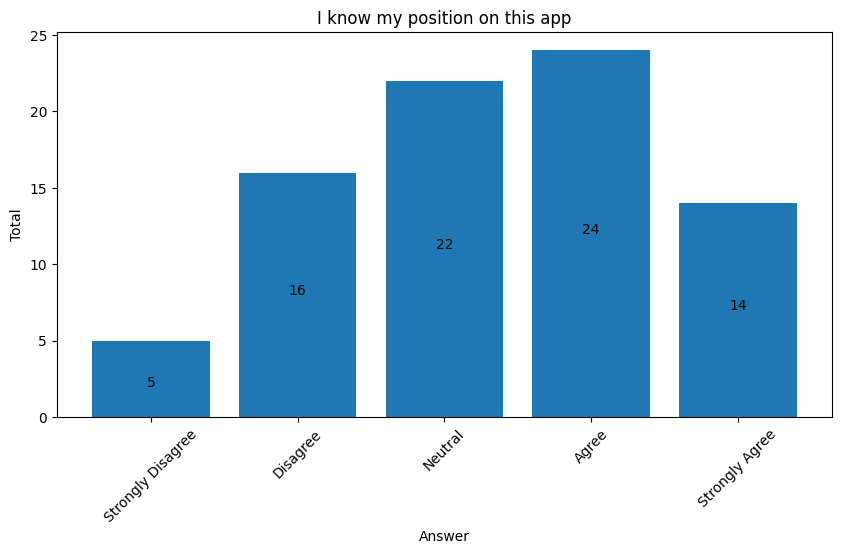

In [148]:
fig = plt.figure(figsize=(10,5))
q2_ans = np.array(q2)
plt.bar(q_question, q2_ans.flatten())
addLabels(q_question, q2_ans.flatten())
plt.title("I know my position on this app")
plt.xlabel("Answer")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.show()

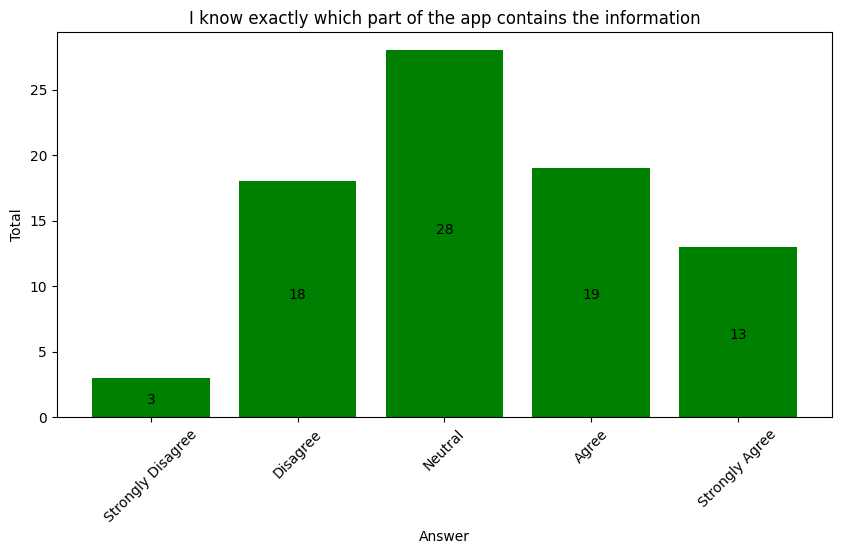

In [149]:
fig = plt.figure(figsize=(10,5))
q3_ans = np.array(q3)
plt.bar(q_question, q3_ans.flatten(), color="green")
addLabels(q_question, q3_ans.flatten())
plt.title("I know exactly which part of the app contains the information")
plt.xlabel("Answer")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.show()